In [ ]:
#importing libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split, KFold, LeaveOneOut, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [ ]:
# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
print("Training data shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Testing data shape:", X_test.shape)
print("Testing labels shape:", y_test.shape)

Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Testing data shape: (10000, 32, 32, 3)
Testing labels shape: (10000, 1)


In [ ]:
# Data Preparation
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train = X_train / 255.0
X_test = X_test / 255.0
y_train = y_train.ravel()
y_test = y_test.ravel()

In [ ]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)


rf_classifier = RandomForestClassifier(n_estimators=100)
rf_classifier.fit(X_train, y_train)                                                # defining all the classifier


knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Model Training
# Choose a suitable machine learning model for image classification
models = {
    "Decision Tree": dt_classifier,
    "Random Forest": rf_classifier,
    "KNN (k=5)": knn_classifier
}

In [ ]:
# Model Evaluation
#results = {}
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    class_report = classification_report(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)
    print(model_name + ":\n")                                        # printing the accuracy , precision , Recall and F1 score
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("\n")
    print("Classification Report:")
    print(class_report)
    print("\n")
    print("Confusion Matrix:")                                        # printing the confusion matrix for all the models
    print(confusion_mat)
    print("\n")

Decision Tree:

Accuracy: 0.2686
Precision: 0.2682164632966951
Recall: 0.2686
F1 Score: 0.2683025697523016


Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.35      0.34      1000
           1       0.28      0.27      0.28      1000
           2       0.21      0.22      0.21      1000
           3       0.19      0.18      0.19      1000
           4       0.23      0.24      0.23      1000
           5       0.23      0.23      0.23      1000
           6       0.28      0.27      0.28      1000
           7       0.28      0.27      0.27      1000
           8       0.37      0.38      0.37      1000
           9       0.29      0.27      0.28      1000

    accuracy                           0.27     10000
   macro avg       0.27      0.27      0.27     10000
weighted avg       0.27      0.27      0.27     10000



Confusion Matrix:
[[353  76  72  51  63  56  38  59 154  78]
 [ 71 274  69  75  59  57  52  61 112 170]
 [1

In [ ]:
# Class-wise Performance
# Analyze and report the model's performance on each of the ten classes individually
class_wise_performance = {}
for model_name, model in models.items():
    class_wise_performance[model_name] = {}
    for class_label in range(10):
        class_indices = np.where(y_test == class_label)[0]
        class_accuracy = accuracy_score(y_test[class_indices], y_pred[class_indices])
        class_wise_performance[model_name][f"Class {class_label}"] = class_accuracy
        print(class_wise_performance)


{'Decision Tree': {'Class 0': 0.537}}
{'Decision Tree': {'Class 0': 0.537, 'Class 1': 0.205}}
{'Decision Tree': {'Class 0': 0.537, 'Class 1': 0.205, 'Class 2': 0.452}}
{'Decision Tree': {'Class 0': 0.537, 'Class 1': 0.205, 'Class 2': 0.452, 'Class 3': 0.217}}
{'Decision Tree': {'Class 0': 0.537, 'Class 1': 0.205, 'Class 2': 0.452, 'Class 3': 0.217, 'Class 4': 0.514}}
{'Decision Tree': {'Class 0': 0.537, 'Class 1': 0.205, 'Class 2': 0.452, 'Class 3': 0.217, 'Class 4': 0.514, 'Class 5': 0.22}}
{'Decision Tree': {'Class 0': 0.537, 'Class 1': 0.205, 'Class 2': 0.452, 'Class 3': 0.217, 'Class 4': 0.514, 'Class 5': 0.22, 'Class 6': 0.248}}
{'Decision Tree': {'Class 0': 0.537, 'Class 1': 0.205, 'Class 2': 0.452, 'Class 3': 0.217, 'Class 4': 0.514, 'Class 5': 0.22, 'Class 6': 0.248, 'Class 7': 0.21}}
{'Decision Tree': {'Class 0': 0.537, 'Class 1': 0.205, 'Class 2': 0.452, 'Class 3': 0.217, 'Class 4': 0.514, 'Class 5': 0.22, 'Class 6': 0.248, 'Class 7': 0.21, 'Class 8': 0.655}}
{'Decision Tree'

In [ ]:
# Validation Sets Evaluation
# 1. No validation set
# 2. 1 validation set with 20% of 80%
# 3. 3-fold cross-validation set
# 4. 5-fold cross-validation set
# 5. 10-fold cross-validation set
# 6. Leave one out cross-validation set
validation_results = {}

# No validation set
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    validation_results[model_name] = accuracy
print(validation_results)

{'Decision Tree': 0.2676, 'Random Forest': 0.467, 'KNN (k=5)': 0.3398}


In [ ]:
# 1 validation set with 20% of 80%
validation_results1 = {}
for model_name, model in models.items():
    X_train_80, X_val, y_train_80, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
    model.fit(X_train_80, y_train_80)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    validation_results1[model_name] = accuracy
print(validation_results1)

{'Decision Tree': 0.2645, 'Random Forest': 0.4653, 'KNN (k=5)': 0.3317}


In [ ]:
# 3-fold cross-validation set
validation_results2 = {}
for model_name, model in models.items():
    accuracy = np.mean(cross_val_score(model, X_train, y_train, cv=3))
    validation_results2[model_name] = accuracy

print(validation_results2)

{'Decision Tree': 0.25771990020417995, 'Random Forest': 0.45349997956239124, 'KNN (k=5)': 0.3253199066583891}


In [ ]:
# 5-fold cross-validation set
validation_results3 = {}
for model_name, model in models.items():
    accuracy = np.mean(cross_val_score(model, X_train, y_train, cv=5))
    validation_results3[model_name] = accuracy

print(validation_results3)

{'Decision Tree': 0.2624, 'Random Forest': 0.45666, 'KNN (k=5)': 0.33205999999999997}


In [ ]:
# 10-fold cross-validation set
validation_results4 = {}
for model_name, model in models.items():
    accuracy = np.mean(cross_val_score(model, X_train, y_train, cv=10))
    validation_results4[model_name] = accuracy

print(validation_results4)

{'Decision Tree': 0.26342, 'Random Forest': 0.46012000000000003, 'KNN (k=5)': 0.33602000000000004}


**Now performing for grayscale**

In [11]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()


x_train_gray = np.mean(x_train, axis=3)
x_test_gray = np.mean(x_test, axis=3)


x_train_gray = np.expand_dims(x_train_gray, axis=-1)
x_test_gray = np.expand_dims(x_test_gray, axis=-1)


x_train_gray = x_train_gray.astype('float32') / 255.0                                          # converting all the images of grey scale image before converting into pixels
x_test_gray = x_test_gray.astype('float32') / 255.0


x_train_flat = x_train_gray.reshape(x_train_gray.shape[0], -1)
x_test_flat = x_test_gray.reshape(x_test_gray.shape[0], -1)


y_train = np.squeeze(y_train)
y_test = np.squeeze(y_test)

In [12]:
rf_classifier = RandomForestClassifier(n_estimators=100)

# Train Random Forest classifier
rf_classifier.fit(x_train_flat, y_train)

# Predict on the test set
y_pred_test = rf_classifier.predict(x_test_flat)                                   # choosing random forest since it was the best classifier for the colour images

# Evaluate the classifier
test_accuracy = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test, average='macro')
recall_test = recall_score(y_test, y_pred_test, average='macro')
f1_test = f1_score(y_test, y_pred_test, average='macro')
confusion_mat_test = confusion_matrix(y_test, y_pred_test)

In [13]:
print("Random Forest Performance on Test Set:\n")
print("Test Accuracy:", test_accuracy)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 Score:", f1_test)
print("Confusion Matrix:")
print(confusion_mat_test)

Random Forest Performance on Test Set:

Test Accuracy: 0.4189
Precision: 0.41510478907546366
Recall: 0.4189
F1 Score: 0.4157071657537147
Confusion Matrix:
[[469  35  97  16  58  21  39  45 171  49]
 [ 24 488  12  24  35  36  72  44  76 189]
 [ 83  45 334  81 139  66 126  56  37  33]
 [ 70  51  85 227  88 175 134  68  28  74]
 [ 69  32 153  54 368  48 116  89  43  28]
 [ 45  36  87 148  88 355  63  90  43  45]
 [ 45  54  81  61 122  62 473  31  18  53]
 [ 41  44  61  63  87  80  50 433  48  93]
 [ 89  77  27  39  39  48  22  40 523  96]
 [ 43 159  23  32  23  21  39  50  91 519]]


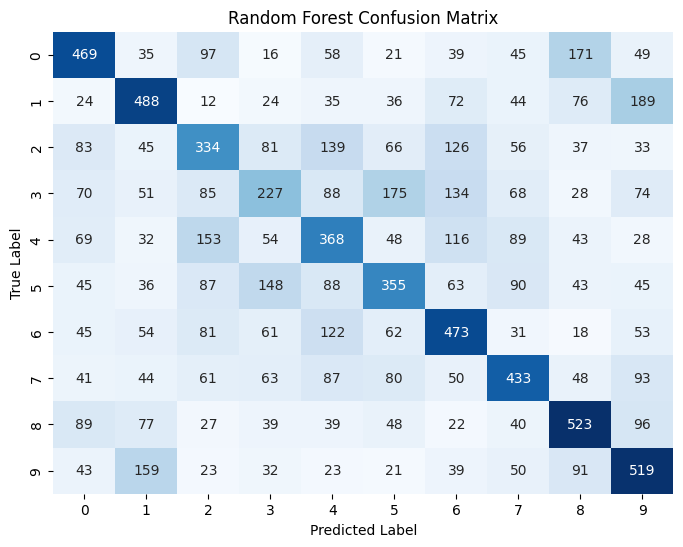

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [15]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()


x_train_gray = np.mean(x_train, axis=3)
x_test_gray = np.mean(x_test, axis=3)


x_train_gray = np.expand_dims(x_train_gray, axis=-1)                                     # having a validation of 20% of the data
x_test_gray = np.expand_dims(x_test_gray, axis=-1)


x_train_gray = x_train_gray.astype('float32') / 255.0
x_test_gray = x_test_gray.astype('float32') / 255.0


x_train_split, x_val_split, y_train_split, y_val_split = train_test_split(x_train_gray, y_train, test_size=0.2, random_state=42)


x_train_flat = x_train_split.reshape(x_train_split.shape[0], -1)
x_val_flat = x_val_split.reshape(x_val_split.shape[0], -1)
x_test_flat = x_test_gray.reshape(x_test_gray.shape[0], -1)


y_train_split = np.squeeze(y_train_split)
y_val_split = np.squeeze(y_val_split)
y_test = np.squeeze(y_test)

In [16]:
rf_classifier = RandomForestClassifier(n_estimators=100)


rf_classifier.fit(x_train_flat, y_train_split)

                                                                  # choosing random forest since it is the best classifer for the  colour images
y_pred_val = rf_classifier.predict(x_val_flat)


val_accuracy = accuracy_score(y_val_split, y_pred_val)
precision_val = precision_score(y_val_split, y_pred_val, average='macro')
recall_val = recall_score(y_val_split, y_pred_val, average='macro')
f1_val = f1_score(y_val_split, y_pred_val, average='macro')
confusion_mat_val = confusion_matrix(y_val_split, y_pred_val)

In [17]:
print("Random Forest Performance on Validation Set:\n")
print("Validation Accuracy:", val_accuracy)
print("Precision:", precision_val)
print("Recall:", recall_val)
print("F1 Score:", f1_val)
print("Confusion Matrix:")
print(confusion_mat_val)


y_pred_test = rf_classifier.predict(x_test_flat)


test_accuracy = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test, average='macro')
recall_test = recall_score(y_test, y_pred_test, average='macro')
f1_test = f1_score(y_test, y_pred_test, average='macro')
confusion_mat_test = confusion_matrix(y_test, y_pred_test)

Random Forest Performance on Validation Set:

Validation Accuracy: 0.4077
Precision: 0.40521411549293074
Recall: 0.40759755854324586
F1 Score: 0.4045882059905163
Confusion Matrix:
[[411  47  76  16  61  35  37  41 185  64]
 [ 33 445  14  42  42  33  49  51  80 190]
 [ 99  32 311  62 152  87 120  83  55  29]
 [ 64  63  93 262 113 164 110  67  27  60]
 [ 68  37 128  40 339  39 119  88  46  29]
 [ 68  46  88 125  90 358  84  88  26  42]
 [ 38  70  76  69 145  64 436  30  21  47]
 [ 45  36  51  57 116  63  70 427  46  83]
 [ 94  92  29  39  33  47  39  42 526  76]
 [ 32 177  15  25  29  35  44  41  80 562]]


In [18]:
print("\nRandom Forest Performance on Test Set:\n")
print("Test Accuracy:", test_accuracy)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 Score:", f1_test)
print("Confusion Matrix:")
print(confusion_mat_test)


Random Forest Performance on Test Set:

Test Accuracy: 0.4111
Precision: 0.4069658885785173
Recall: 0.41109999999999997
F1 Score: 0.4077523198832672
Confusion Matrix:
[[476  36  82  20  60  16  40  41 178  51]
 [ 32 475  15  36  34  33  59  51  80 185]
 [ 97  40 324  69 142  68 117  60  49  34]
 [ 78  54  88 217  94 164 121  91  25  68]
 [ 53  32 158  48 362  58 122  82  58  27]
 [ 55  37  92 129  88 383  69  72  32  43]
 [ 40  61  93  74 120  58 458  31  20  45]
 [ 47  52  48  71 119  88  46 391  51  87]
 [ 86  82  31  33  35  43  17  47 541  85]
 [ 49 164  18  30  28  23  52  52 100 484]]


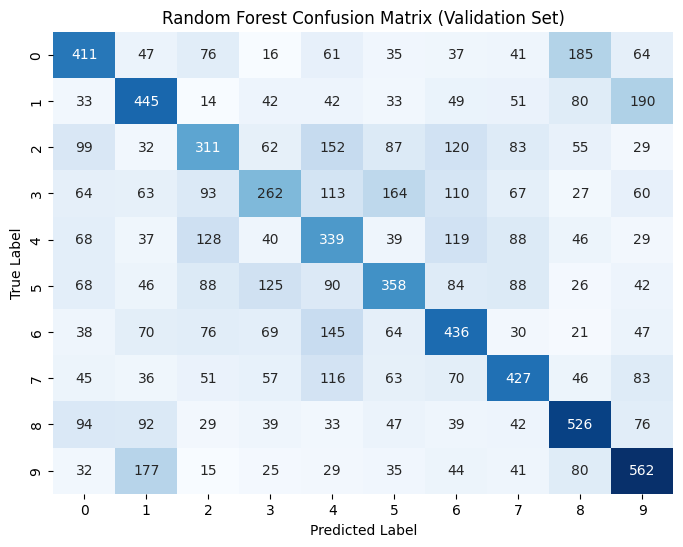

In [19]:
# Plot confusion matrix for validation set
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat_val, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest Confusion Matrix (Validation Set)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

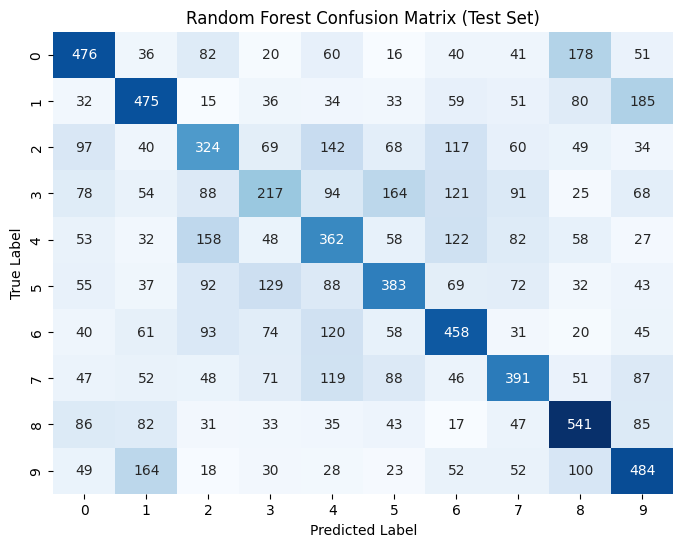

In [20]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest Confusion Matrix (Test Set)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [21]:
import numpy as np
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train_gray = np.mean(x_train, axis=3)
x_test_gray = np.mean(x_test, axis=3)


x_train_gray = np.expand_dims(x_train_gray, axis=-1)
x_test_gray = np.expand_dims(x_test_gray, axis=-1)


x_train_gray = x_train_gray.astype('float32') / 255.0
x_test_gray = x_test_gray.astype('float32') / 255.0


x_train_flat = x_train_gray.reshape(x_train_gray.shape[0], -1)
x_test_flat = x_test_gray.reshape(x_test_gray.shape[0], -1)


y_train = np.squeeze(y_train)
y_test = np.squeeze(y_test)

In [22]:
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
rf_classifier = RandomForestClassifier(n_estimators=100)


skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)                            # performing 3 fold cross validation using random forest since it is the best classifier for colour images
y_pred_cv = cross_val_predict(rf_classifier, x_train_flat, y_train, cv=skf)


accuracy = accuracy_score(y_train, y_pred_cv)
precision = precision_score(y_train, y_pred_cv, average='macro')
recall = recall_score(y_train, y_pred_cv, average='macro')
f1 = f1_score(y_train, y_pred_cv, average='macro')
conf_mat = confusion_matrix(y_train, y_pred_cv)

Random Forest 3-Fold Cross-Validation Results:
Accuracy: 0.40316
Precision: 0.4002129849900052
Recall: 0.40316
F1 Score: 0.40010509980603165


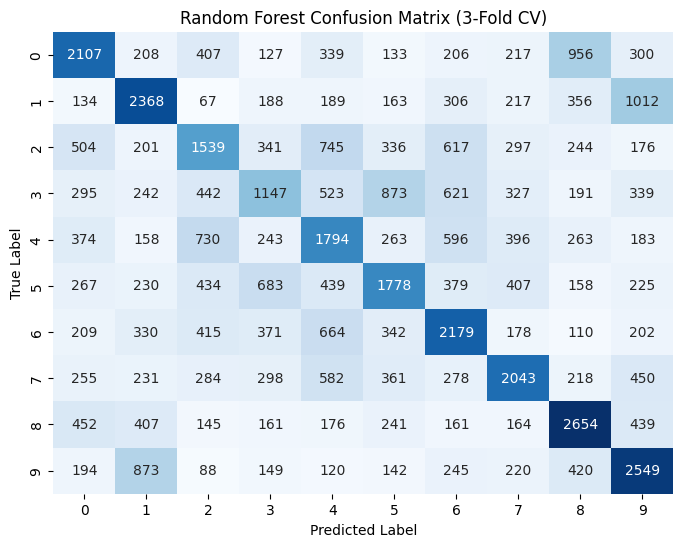

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
print("Random Forest 3-Fold Cross-Validation Results:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest Confusion Matrix (3-Fold CV)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [24]:
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
rf_classifier = RandomForestClassifier(n_estimators=100)

skf = StratifiedKFold(n_splits= 5 , shuffle=True, random_state=42)
y_pred_cv = cross_val_predict(rf_classifier, x_train_flat, y_train, cv=skf)                  # performing 5 fold cross validation using random forest since it is the best classifier using colour images

accuracy = accuracy_score(y_train, y_pred_cv)
precision = precision_score(y_train, y_pred_cv, average='macro')
recall = recall_score(y_train, y_pred_cv, average='macro')
f1 = f1_score(y_train, y_pred_cv, average='macro')
conf_mat = confusion_matrix(y_train, y_pred_cv)

Random Forest 5-Fold Cross-Validation Results:
Accuracy: 0.4083
Precision: 0.405457668077892
Recall: 0.4083
F1 Score: 0.4053786404350507


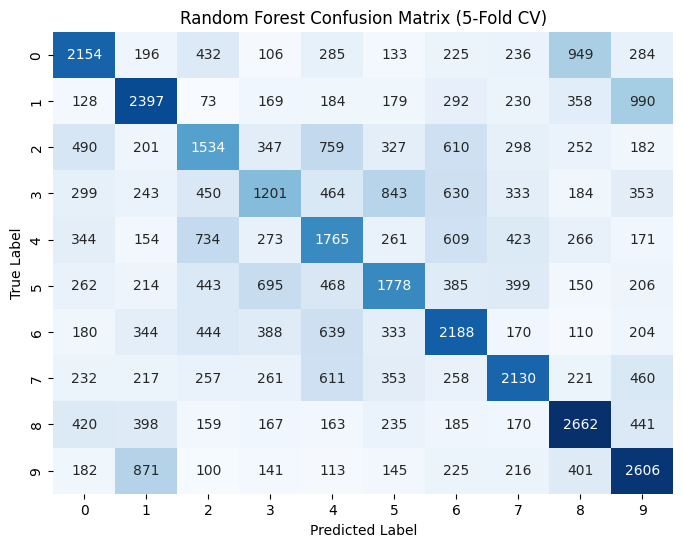

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
print("Random Forest 5-Fold Cross-Validation Results:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest Confusion Matrix (5-Fold CV)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [26]:
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
rf_classifier = RandomForestClassifier(n_estimators=100)

                                                                                          # Performing 10 fold cross validation using random forest since it was the best using colour images
skf = StratifiedKFold(n_splits= 10 , shuffle=True, random_state=42)
y_pred_cv = cross_val_predict(rf_classifier, x_train_flat, y_train, cv=skf)


accuracy = accuracy_score(y_train, y_pred_cv)
precision = precision_score(y_train, y_pred_cv, average='macro')
recall = recall_score(y_train, y_pred_cv, average='macro')
f1 = f1_score(y_train, y_pred_cv, average='macro')
conf_mat = confusion_matrix(y_train, y_pred_cv)

Random Forest 10-Fold Cross-Validation Results:
Accuracy: 0.41078
Precision: 0.40767806770216375
Recall: 0.41078000000000003
F1 Score: 0.40771610920673834


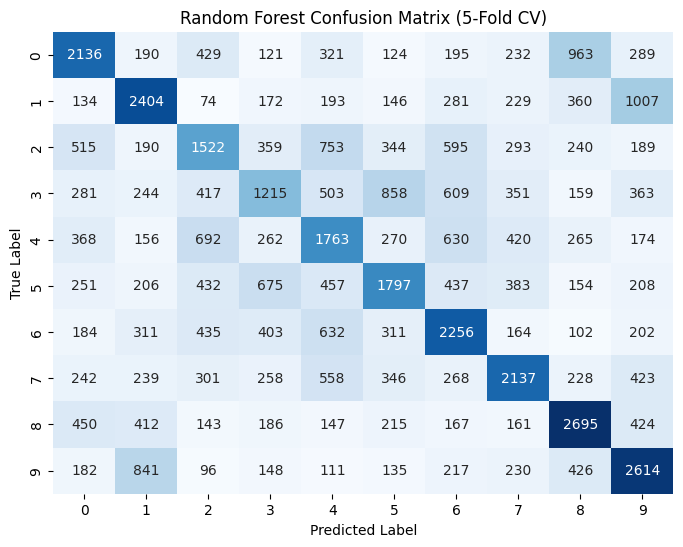

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
print("Random Forest 10-Fold Cross-Validation Results:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest Confusion Matrix (5-Fold CV)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()